In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data = fetch_ucirepo(id=468)

X = pd.DataFrame(data.data.features)
y = pd.Series(data.data.targets.values.ravel(), name='Revenue')

#codificação de variáveis categóricas

X_encoded = X.copy()
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])

#divisão dos dados - 80/20
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

#normalização dos dados

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
#definição e configuração do MLP e hiperparametros

mlp = MLPClassifier()
params = {
    'hidden_layer_sizes': [(100, 150),(50,100)],
    'activation': ['relu','tanh','logistic'],
    'learning_rate_init': [0.001,0.0001],
    'alpha': [0.01,0.001],
    'solver': ['adam'],
    'max_iter': [500]
}
gs_mlp = GridSearchCV(mlp, params, cv = 3, verbose = 3,scoring = 'accuracy')

gs_mlp.fit(X_train, y_train)
print("Best parameters:\n", gs_mlp.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.879 total time=  16.2s
[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.880 total time=  14.3s
[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.869 total time=  17.7s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.892 total time=  28.9s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.897 total time=  31.0s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.888 total time=  31.0s
[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.879 total time=  19.8s
[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.866 total time=  17.6s
[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.865 total time=  17.9s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.896 total time=  20.1s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time=  19.9s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.891 total time=  19.7s
[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.875 total time=  17.5s
[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.863 total time=  14.2s
[CV 3/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.863 total time=  13.5s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time=  30.9s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.891 total time=  31.5s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.887 total time=  30.6s
[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.871 total time=  16.6s
[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.860 total time=  18.7s
[CV 3/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.874 total time=  16.9s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time=  19.3s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.899 total time=  20.3s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.887 total time=  20.0s
[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.878 total time=  28.8s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.877 total time=  32.9s
[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.866 total time=  30.0s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.897 total time=  36.8s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.898 total time=  35.5s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.889 total time=  32.3s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.881 total time=  18.3s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.865 total time=  18.5s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.867 total time=  20.3s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.897 total time=  18.9s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.899 total time=  18.4s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.893 total time=  18.1s
[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.876 total time=  27.4s
[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.873 total time=  27.3s
[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.872 total time=  29.1s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.895 total time=  32.7s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time=  32.4s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.889 total time=  33.0s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.874 total time=  19.5s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.865 total time=  19.3s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.873 total time=  18.4s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.898 total time=  19.1s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.895 total time=  20.0s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.891 total time=  20.9s
[CV 1/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.900 total time=  26.1s
[CV 2/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.896 total time=  39.6s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.889 total time= 1.2min
[CV 1/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.891 total time=  19.9s
[CV 2/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.893 total time= 1.1min
[CV 3/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.888 total time=  57.1s
[CV 1/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.897 total time=  12.1s
[CV 2/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.894 total time=  38.0s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.892 total time=  40.9s
[CV 1/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.891 total time=  21.5s
[CV 2/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time=  34.9s
[CV 3/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.887 total time=  16.6s
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.897 total time=  41.5s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.892 total time= 1.2min


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.884 total time= 1.2min
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.896 total time= 1.1min


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time= 1.3min
[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.890 total time= 1.1min


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.894 total time=  40.5s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.884 total time=  41.4s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.887 total time=  41.4s
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time=  24.2s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time=  41.4s
[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.887 total time=  20.1s
Best parameters:
 {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 100), 'learning_rate_init': 0.0001, 'max_iter': 500, 'solver': 'adam'}


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
optimized_mlp = MLPClassifier(
    hidden_layer_sizes = (50, 100),
    activation = 'tanh',
    alpha = 0.01,
    learning_rate_init = 0.001,
    max_iter = 600,
    solver = 'adam',
    verbose = True
)
optimized_mlp.fit(X_train, y_train)
optimized_mlp_pred = optimized_mlp.predict(X_test)

Iteration 1, loss = 0.37912493
Iteration 2, loss = 0.29067619
Iteration 3, loss = 0.28544030
Iteration 4, loss = 0.28356094
Iteration 5, loss = 0.27926067
Iteration 6, loss = 0.27498426
Iteration 7, loss = 0.27065652
Iteration 8, loss = 0.26533692
Iteration 9, loss = 0.26220182
Iteration 10, loss = 0.25914313
Iteration 11, loss = 0.25591538
Iteration 12, loss = 0.25307403
Iteration 13, loss = 0.25182582
Iteration 14, loss = 0.24935596
Iteration 15, loss = 0.24914606
Iteration 16, loss = 0.24779131
Iteration 17, loss = 0.24595183
Iteration 18, loss = 0.24472686
Iteration 19, loss = 0.24397005
Iteration 20, loss = 0.24282070
Iteration 21, loss = 0.24311473
Iteration 22, loss = 0.24129459
Iteration 23, loss = 0.24032124
Iteration 24, loss = 0.24086942
Iteration 25, loss = 0.23937858
Iteration 26, loss = 0.23849978
Iteration 27, loss = 0.23797253
Iteration 28, loss = 0.23794528
Iteration 29, loss = 0.23531189
Iteration 30, loss = 0.23482933
Iteration 31, loss = 0.23494981
Iteration 32, los

c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(



🔍 Matriz de Confusão:
[[1917  167]
 [ 169  213]]

📊 Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.92      0.92      0.92      2084
        True       0.56      0.56      0.56       382

    accuracy                           0.86      2466
   macro avg       0.74      0.74      0.74      2466
weighted avg       0.86      0.86      0.86      2466


✅ Acurácia: 0.8637


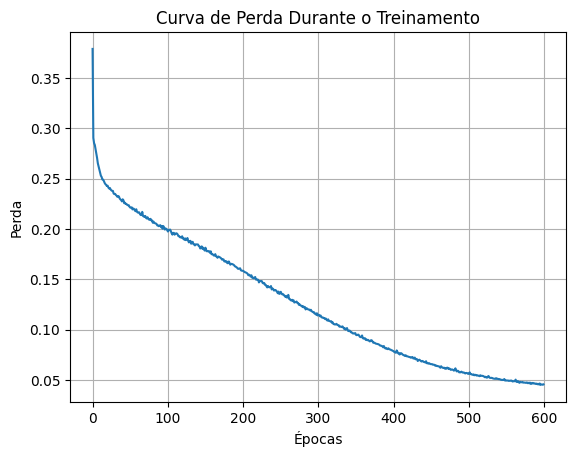

In [5]:
print("\n🔍 Matriz de Confusão:")
print(confusion_matrix(y_test, optimized_mlp_pred))

print("\n📊 Relatório de Classificação:")
print(classification_report(y_test, optimized_mlp_pred))

print(f"\n✅ Acurácia: {accuracy_score(y_test, optimized_mlp_pred):.4f}")

#Curva de perda
plt.plot(optimized_mlp.loss_curve_)
plt.title("Curva de Perda Durante o Treinamento")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.grid(True)
plt.show()

KNN

K=1 → Acurácia: 0.8423
K=3 → Acurácia: 0.8642
K=5 → Acurácia: 0.8678
K=7 → Acurácia: 0.8783
K=9 → Acurácia: 0.8792
K=11 → Acurácia: 0.8771


,K,Acurácia
0,9,0.879157
1,7,0.878345
2,11,0.877129
3,5,0.867802
4,3,0.864152
5,1,0.842255


C:\Users\Tiago\AppData\Local\Temp\ipykernel_4016\1275377054.py:36: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


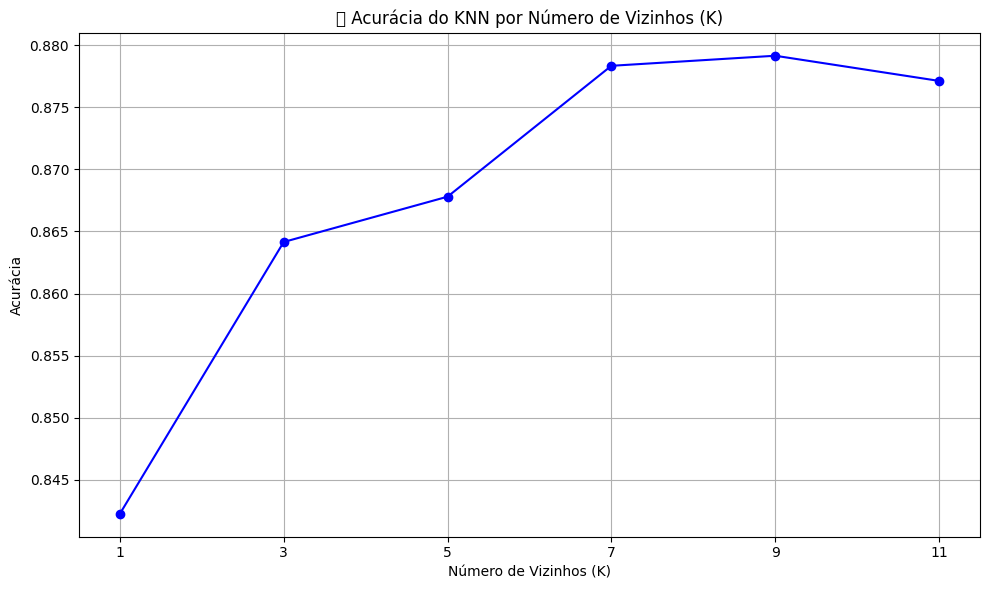


🔍 Matriz de Confusão (K=9):
[[2032   52]
 [ 246  136]]

📋 Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2084
        True       0.72      0.36      0.48       382

    accuracy                           0.88      2466
   macro avg       0.81      0.67      0.70      2466
weighted avg       0.87      0.88      0.86      2466


✅ Acurácia Final: 0.8792


In [6]:
# Separação dos dados para o KNN
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# Normalização exclusiva para o KNN
scaler_knn = StandardScaler()
X_train_knn = scaler_knn.fit_transform(X_train_knn)
X_test_knn = scaler_knn.transform(X_test_knn)

# Teste com diferentes valores de k
k_values = [1, 3, 5, 7, 9, 11]
accuracies_knn = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)
    y_pred = knn.predict(X_test_knn)
    acc = accuracy_score(y_test_knn, y_pred)
    accuracies_knn.append(acc)
    print(f"K={k} → Acurácia: {acc:.4f}")

# 📊 Tabela da acurácia por valor de K
df_knn = pd.DataFrame({'K': k_values, 'Acurácia': accuracies_knn})
display(df_knn.sort_values(by='Acurácia', ascending=False).reset_index(drop=True))


# Gráfico mais bonito e informativo
plt.figure(figsize=(10, 6))
plt.plot(df_knn['K'], df_knn['Acurácia'], marker='o', linestyle='-', color='blue')
plt.xticks(k_values)
plt.title("🧠 Acurácia do KNN por Número de Vizinhos (K)")
plt.xlabel("Número de Vizinhos (K)")
plt.ylabel("Acurácia")
plt.grid(True)
plt.tight_layout()
plt.show()


# Avaliação final com o melhor k
melhor_k = k_values[accuracies_knn.index(max(accuracies_knn))]
knn_final = KNeighborsClassifier(n_neighbors=melhor_k)
knn_final.fit(X_train_knn, y_train_knn)
y_pred_final = knn_final.predict(X_test_knn)

print(f"\n🔍 Matriz de Confusão (K={melhor_k}):")
print(confusion_matrix(y_test_knn, y_pred_final))

print("\n📋 Relatório de Classificação:")
print(classification_report(y_test_knn, y_pred_final))

print(f"\n✅ Acurácia Final: {accuracy_score(y_test_knn, y_pred_final):.4f}")